<a href="https://colab.research.google.com/github/kimaya-k/Stanford-Cars-Classification/blob/master/classifier_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal


### To train a classifier to predict a car's make based on inception_v3 model using [Monk](https://github.com/Tessellate-Imaging/monk_v1)


Source: https://towardsdatascience.com/car-classification-using-inception-v3-71b63e9825b7

Classifier made by: Kimaya, Jeff, Aneesh, Claire

###Before we get started, first we mount drive (bring it locally)

In [ ]:
#from google.colab import drive
#drive.mount('/home/home/Desktop/test2/data/cars_196/')
#drive._mount('/content/drive')

from google.colab import drive
drive.mount('/content/drive')
!ls

Mounted at /content/drive
drive  sample_data


###Then we change directory to project directory to save it there

In [ ]:
import os
os.chdir("/content/drive/MyDrive/S14A2023/Image_classifier")
!ls -al

total 1914378
drwx------ 2 root root       4096 Jan  9 08:35 cars_test
drwx------ 2 root root       4096 Jan  9 08:35 cars_train
drwx------ 2 root root       4096 Jan  9 08:42 devkit
-rw------- 1 root root       1654 Jan  9 08:39 README.txt
-rw------- 1 root root 1959428284 Oct  1  2019 stanford-cars-dataset.zip
-rw------- 1 root root      28123 Jan  9 08:39 train_perfect_preds.txt
-rw------- 1 root root     139671 Jan  9 08:43 vehicles_make.csv
-rw------- 1 root root     137899 Jan  9 08:37 vehicles_make_test.csv
-rw------- 1 root root     163937 Jan  9 08:43 vehicles_model.csv
-rw------- 1 root root     161811 Jan  9 08:37 vehicles_model_test.csv
-rw------- 1 root root     122170 Jan  9 08:43 vehicles_year.csv
-rw------- 1 root root     120625 Jan  9 08:37 vehicles_year_test.csv
drwx------ 2 root root       4096 Jan  9 08:46 workspace


# Table of Contents
Steps to achieve goal:
1.   Installing Monk
2.   Loading Dataset into directory
3.   Creating Labels
4.   Creating the Directory Structure
5.   Imports and Installations
6.   Make Classifier - Training the data
7.   Make Classifier - View and Test the Results

We have also included the Model and Year classifiers below this with Training, View and Testing processes of their own completed. This gives us a complete Image Classiier for Cars by Make, Model and Year.





<a id='0'></a>
# Step 1: Install Monk
Using pip to install all needed packages


  - colab (gpu)
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu)
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu
      - All backend: `pip install -U monk-cpu`
	  - Gluon backend: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

In [ ]:
! pip install -U monk-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.0/515.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.0/360.0 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.9 MB/s eta 0:00:00
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=eda19fd9e9f3bbdb88d4ad6cb979b1b9e89d4b641a5f90923ba7f2f541febec1
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built GPUtil
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [ ]:
#!git clone https://github.com/Tessellate-Imaging/monk_v1.git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# If using Colab install using the commands below

# JAB commented out
#!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimayak28","key":"8e762f3783e492644c76ff76e5c13cba"}'}

In [ ]:
!ls -lha kaggle.json

-rw------- 1 root root 65 Jan  9 12:30 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd
#!mkdir /content/drive/MyDrive/S14A2023/Image_classifier

/content/drive/MyDrive/S14A2023/Image_classifier


In [ ]:
import os
os.chdir("/content/drive/MyDrive/S14A2023/Image_classifier")

In [ ]:
!kaggle datasets list

ref                                                          title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                   Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32           3048         58  1.0              
thedrcat/daigt-v2-train-dataset                              DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           3611        290  1.0              
sazidthe1/world-population-data                              World Population Data                        14KB  2024-01-01 17:42:09            841         27  1.0              
pushpakhinglaspure/used-car-price-prediction                 Used Car Price Prediction                     4KB  202

In [ ]:
!kaggle datasets download -d jessicali9530/stanford-cars-dataset

stanford-cars-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#!ls -l
#!rm -r cars_test
#!rm -r cars_train
!unzip -o stanford-cars-dataset.zip
#!rm -r cars_test/cars_test

Streaming output truncated to the last 5000 lines.
  inflating: cars_train/cars_train/03145.jpg  
  inflating: cars_train/cars_train/03146.jpg  
  inflating: cars_train/cars_train/03147.jpg  
  inflating: cars_train/cars_train/03148.jpg  
  inflating: cars_train/cars_train/03149.jpg  
  inflating: cars_train/cars_train/03150.jpg  
  inflating: cars_train/cars_train/03151.jpg  
  inflating: cars_train/cars_train/03152.jpg  
  inflating: cars_train/cars_train/03153.jpg  
  inflating: cars_train/cars_train/03154.jpg  
  inflating: cars_train/cars_train/03155.jpg  
  inflating: cars_train/cars_train/03156.jpg  
  inflating: cars_train/cars_train/03157.jpg  
  inflating: cars_train/cars_train/03158.jpg  
  inflating: cars_train/cars_train/03159.jpg  
  inflating: cars_train/cars_train/03160.jpg  
  inflating: cars_train/cars_train/03161.jpg  
  inflating: cars_train/cars_train/03162.jpg  
  inflating: cars_train/cars_train/03163.jpg  
  inflating: cars_train/cars_train/03164.jpg  
  inflati

In [ ]:
!pwd
#!mv cars_train/cars_train/* cars_train/
#!mv cars_test/cars_test/* cars_test/
!rmdir cars_train/cars_train
!rmdir cars_test/cars_test
#!ls -l cars_train/ | wc -l
#!ls -l cars_test/ | wc -l
#8145
#8042


/content/drive/MyDrive/S14A2023/Image_classifier
^C
8146
8043


In [ ]:
#!mv /content/drive/MyDrive/S14A2023/Image_classifier/cars_test/cars_test/* /content/drive/MyDrive/S14A2023/Image_classifier/cars_test

In [ ]:
#!mv /content/cars_train/cars_test/* /content/gdrive/MyDrive/S14A2023/Image_classifier/cars_test

mv: cannot stat '/content/cars_train/cars_test/*': No such file or directory


In [ ]:
!mkdir devkit
!cd devkit
from google.colab import files
files.upload()

#!ls -l

Saving eval_train.m to eval_train.m
Saving cars_meta.mat to cars_meta.mat
Saving cars_test_annos.mat to cars_test_annos.mat
Saving cars_train_annos.mat to cars_train_annos.mat
Saving train_perfect_preds.txt to train_perfect_preds.txt
Saving README.txt to README.txt


{'eval_train.m': b"function [accuracy, confusion_matrix] = eval_train(pred_fname)\n% Evaluates training accuracy.\n% Arguments:\n%   pred_fname: Filename of prediction file for training. The required format\n%     is described in the README.\n% Returns:\n%   accuracy: The accuracy on the training set.\n%   confusion_matrix: The confusion matrix on the training set.\n\naccuracy = [];\nconfusion_matrix = [];\n\ntrain_data = load('cars_train_annos.mat');\ntrain_annos = train_data.annotations;\ntrain_classes = [train_annos.class];\nunique_classes = unique(train_classes);\n\ntry\n  preds = csvread(pred_fname);\ncatch err\n  fprintf('Invalid file format for input file %s.', pred_fname);\n  return\nend\n\n\n% Check whether predictions look sane\nif numel(preds) ~= numel(train_classes)\n  fprintf(['Given predictions have length %d but there are %d images ' ...\n    'in the training set.\\n'], numel(preds), numel(train_classes));\n  return;\nelseif any(~ismember(preds, unique_classes))\n  bad_i

In [ ]:
#!mv eval_train* devkit/
!ls -l devkit

total 727
-rw------- 1 root root 394471 Oct  1  2019 cars_annos.mat
-rw------- 1 root root   3177 Jan  9 08:39 cars_meta.mat
-rw------- 1 root root 155831 Jan  9 08:39 cars_test_annos.mat
-rw------- 1 root root 187916 Jan  9 08:39 cars_train_annos.mat
-rw------- 1 root root   1248 Jan  9 08:39 eval_train.m


In [ ]:
# Add to system path
import sys
sys.path.append("monk_v1/")

###Step 1 Complete

# Step 2: Loading Dataset into directory

The dataset is divided into two parts, train and test dataset, each containing around 8000 images. We have the images for the dataset stored in a google drive folder that we will now load into a directory.



In [ ]:
#! mkdir data  # Creating a directory for the dataset (commented out to avoid rerunning and recreating)

#! mkdir cars_train
#! mkdir cars_test

Now we will tar the cars_train files, the cars_test files and the devkit files

In [ ]:
! pwd
#! mv ../../*.jpg .
#! mkdir Model_classifier
#! ls -l Model_classifier/cars_train | wc -l
#! ls -l Model_classifier/cars_test | wc -l
#! ls -l /content/
#https://s3.amazonaws.com/fast-ai-imageclas/stanford-cars.tgz

/content
total 4
drwxr-xr-x 1 root root 4096 Jan  5 14:22 sample_data


Train Data

In [ ]:
#! tar -xvf 'cars_train.tgz' -C 'cars_train'

tar: cars_train.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


Devkit

In [ ]:
#! tar -xvf 'car_devkit.tgz' -C 'data'

Test Data

In [ ]:
#! tar -xvf 'cars_test.tgz' -C './cars_test'

In [ ]:
#! ls -1


! ls cars_train/cars_train | wc -l

! ls cars_test/cars_test/ | wc -l

# Download test annotations with labels

8144
8041


###Step 2 Complete

## Step 3: Creating the Labels
The labels corresponding to each image are stored in the devkit.

The Results we expect from the labelling are the following files:

- cars_meta.mat:
  Contains a cell array of class names, one for each class.

- cars_train_annos.mat:
  Contains the variable 'annotations', which is a struct array of length
  num_images and where each element has the fields:
>  1.  bbox_x1: Min x-value of the bounding box, in pixels
>  2.  bbox_x2: Max x-value of the bounding box, in pixels
>  3.  bbox_y1: Min y-value of the bounding box, in pixels
>  4.  bbox_y2: Max y-value of the bounding box, in pixels
>  5.  class: Integral id of the class the image belongs to.
>  6.  fname: Filename of the image within the folder of images.

- cars_test_annos.mat:
  Same format as 'cars_train_annos.mat', except the class is not provided.

- cars_test_annos_withlabels.mat:
  Same format as 'cars_train_annos.mat', including the class



### Converting the ID to its corresponding label


In [ ]:
from scipy import io  # Required to load .mat file
import pandas as pd

In [ ]:
class_name = io.loadmat('./devkit/cars_meta.mat')
#class_name = io.loadmat('cars_annos.mat')


In [ ]:
combined = []
for name in class_name['class_names'][0]:
  name=name.flat[0]
  splits = name.split(" ")
  make = splits[0]
  year = splits[len(splits)-1]
  model = ""
  for tmp in splits[1:len(splits)-2]:
    model = model + tmp + "_"
  combined.append([make,model,year])

###Examples for IDs and class names:

In [ ]:
print("ID\t "+"{:<20}".format("Make")+ "{:<20}".format("Model")+ "{:<20}".format("Year"))
for i in [140,60,18,50,161]:
  print(str(i)+"\t "+"{:<20}".format(combined[i][0])+"{:<20}".format(combined[i][1])+"{:<20}".format(combined[i][2]))

ID	 Make                Model               Year                
140	 Infiniti            G_Coupe_            2012                
60	 Chevrolet           Impala_             2007                
18	 Audi                TT_                 2011                
50	 Cadillac            CTS-V_              2012                
161	 Mercedes-Benz       C-Class_            2012                


### Assigning a label to each image in the train dataset

In [ ]:
train_labels = io.loadmat('./devkit/cars_train_annos.mat')
#train_labels = io.loadmat('cars_annos.mat')

In [ ]:
data=[[row.flat[0] for row in line][4:] for line in train_labels['annotations'][0]]

In [ ]:
# Separating make, model and year for each image and saving them in different csv files
make = [[row[1],combined[row[0]-1][0]] for row in data]
model= [[row[1],combined[row[0]-1][1]] for row in data]
year = [[row[1],combined[row[0]-1][2]] for row in data]

df = pd.DataFrame(make, columns = ['ID', 'Labels'])
df.to_csv("vehicles_make.csv", index = False)
df = pd.DataFrame(model, columns = ['ID', 'Labels'])
df.to_csv("vehicles_model.csv", index = False)
df = pd.DataFrame(year, columns = ['ID', 'Labels'])
df.to_csv("vehicles_year.csv", index = False)

### Assigning a label to each image in the test dataset

In [ ]:
test_labels = io.loadmat('./cars_test_annos_withlabels.mat')

FileNotFoundError: [Errno 2] No such file or directory: './cars_test_annos_withlabels.mat'

In [ ]:
data_test=[[row.flat[0] for row in line][4:] for line in test_labels['annotations'][0]]

NameError: name 'test_labels' is not defined

In [ ]:
# Separating make, model and year for each image and saving them in different csv files
make = [[row[1],combined[row[0]-1][0]] for row in data_test]
model= [[row[1],combined[row[0]-1][1]] for row in data_test]
year = [[row[1],combined[row[0]-1][2]] for row in data_test]

df = pd.DataFrame(make, columns = ['ID', 'Labels'])
df.to_csv("vehicles_make_test.csv", index = False)
df = pd.DataFrame(model, columns = ['ID', 'Labels'])
df.to_csv("vehicles_model_test.csv", index = False)
df = pd.DataFrame(year, columns = ['ID', 'Labels'])
df.to_csv("vehicles_year_test.csv", index = False)

NameError: name 'data_test' is not defined

### Sample entries from vehicles_make.csv
<pre>
ID              Label
00014.jpg       Dodge
00036.jpg       Ferrari
00048.jpg       Rolls-Royce
</pre>

Sample entries from vehicles_model.csv
<pre>
ID              Label
00014.jpg       Caravan_
00036.jpg       458_Italia_
00048.jpg       Phantom_
</pre>

Sample entries from vehicles_year.csv
<pre>
ID              Label
00014.jpg       1997
00036.jpg       2012
00048.jpg       2012
</pre>

Images in dataset:

00014.jpg

<img src="https://drive.google.com/uc?export=view&id=1-0_eoMety04waAk3r29RMGfkwWsOQW58" alt="00014.jpg" width="350"/>

00036.jpg

<img src="https://drive.google.com/uc?export=view&id=113F-nZDoU9JyfrKjdUikepdEpGU5LeIX" alt="00036.jpg" width="350"/>

00048.jpg

<img src="https://drive.google.com/uc?export=view&id=12IlZGMq3icNLuHfA3L7nyc2LRG0XbEP-" alt="00048.jpg" width="350"/>

###Step 3 Complete

# Step 4: Creating the Directory structure
This is how it looks. We have achieved this in our google drive folder accordingly.


```
./Project_directory/ (root_dir)
      |
      |-----------data (for dataset)
      |              |
      |              |-----------cars_test
      |              |              |
      |              |              |----------00001.jpg
      |              |              |----------00002.jpg
      |              |              |----------........(and so on)
      |              |
      |              |-----------cars_train
      |              |              |
      |              |              |----------00001.jpg
      |              |              |----------00002.jpg
      |              |              |----------........(and so on)
      |              |
      |              |-----------devkit
      |              |              |
      |              |              |----------cars_meta.mat
      |              |              |----------cars_train_annos.mat  
      |              |              |----------train_perfect_preds.txt
      |              |              |----------cars_test_annos.mat
      |              |              |----------eval_train.m
      |              |              |----------cars_test_annos_withlabels.mat
      |              |              |----------README.txt
      |
      |-----------monk_v1 (Monk library)
      |              |
      |              |----------....
      |                             _
      |-----------car_devkit.tgz     |
      |-----------cars_train.tgz     |   (zipped dataset files)
      |-----------cars_test.tgz     _|
      |                                    _
      |-----------vehicles_make.csv         |
      |-----------vehicles_model.csv        |
      |-----------vehicles_year.csv         |
      |                                     |  (csv files containing labels)
      |-----------vehicles_make_test.csv    |
      |-----------vehicles_model_test.csv   |
      |-----------vehicles_year_test.csv   _|

      

```

###Step 4 Complete



# Step 5: Imports and Installations
Now we will import and install the appropriate packages and libraries needed for the classifer. Most installations took place earlier.

In [ ]:
import os
import sys

In [ ]:
#Using PyTorch backend

# When installed using pip
from monk.pytorch_prototype import prototype


# When installed manually (Uncomment the following)
# sys.path.append("monk_v1/");
# sys.path.append("monk_v1/monk/");
# from monk.pytorch_prototype import prototype

###Step 5 Complete

<a id='3'></a>
# Step 6: Make Classifier: Training the Data
The code to train the data is below. This is the process of training the data with certain parameters to create the model.

In [ ]:
# Load experiment
gtf = prototype(verbose=1);
gtf.Prototype("Make_classifier", "inception-v3-pytorch")


gtf.Dataset_Params(dataset_path="./cars_train",
                   path_to_csv="vehicles_make.csv",
                   split=0.8, input_size=299,
                   batch_size=256,
                   shuffle_data=True,
                   num_processors=3)

# Transform
gtf.apply_random_horizontal_flip(train=True, val=True)
gtf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True)

# Set Dataset
gtf.Dataset();

Pytorch Version: 2.1.0+cu121

Experiment Details
    Project: Make_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/MyDrive/S14A2023/Image_classifier/workspace/Make_classifier/inception-v3-pytorch/

Dataset Details
    Train path:     ./cars_train
    Val path:       None
    CSV train path: vehicles_make.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:  299
    Batch Size:  256
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.8
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      49



In [ ]:
# Set model parameters
gtf.Model_Params(model_name="inception_v3", freeze_base_network=True, use_gpu=True, use_pretrained=True);

# Load model
gtf.Model()

# Freeze first 100 layers of the pretrained model
gtf.Freeze_Layers(num=100)

Model Params
    Model name:           inception_v3
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 2

Model params post freezing
    Num trainable layers: 95



In [ ]:
# Set Training parameters
gtf.Training_Params(num_epochs=10, display_progress=True, display_progress_realtime=True,
                    save_intermediate_models=True, save_training_logs=True)

# Using RMSprop optimizer
gtf.optimizer_sgd(0.06)

# Fixed learning rate
gtf.lr_fixed()

Training params
    Num Epochs: 10

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_

Optimizer
    Name:          sgd
    Learning rate: 0.06
    Params:        {'lr': 0.06, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   fixed
    Params: {}



In [ ]:
# gtf.List_Losses()
gtf.loss_softmax_crossentropy()

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [ ]:
#Start Training
gtf.Train();

Training Start
    Epoch 1/10
    ----------


100%|██████████| 26/26 [01:20<00:00,  3.09s/it]

100%|██████████| 7/7 [00:19<00:00,  1.99s/it]



    curr_lr - 0.06
    [Epoch 1] Train-acc: 0.137, Train-loss: 4.654 | Val-acc: 0.220994, Val-loss: 2.999, | time: 102.5 sec

    Epoch 2/10
    ----------


100%|██████████| 26/26 [01:21<00:00,  3.15s/it]

100%|██████████| 7/7 [00:19<00:00,  1.76s/it]



    curr_lr - 0.06
    [Epoch 2] Train-acc: 0.283, Train-loss: 3.775 | Val-acc: 0.348680, Val-loss: 2.484, | time: 105.0 sec

    Epoch 3/10
    ----------


100%|██████████| 26/26 [01:19<00:00,  3.05s/it]

100%|██████████| 7/7 [00:19<00:00,  1.97s/it]



    curr_lr - 0.06
    [Epoch 3] Train-acc: 0.446, Train-loss: 2.988 | Val-acc: 0.447514, Val-loss: 2.088, | time: 101.0 sec

    Epoch 4/10
    ----------


100%|██████████| 26/26 [01:21<00:00,  3.14s/it]

100%|██████████| 7/7 [00:19<00:00,  1.84s/it]



    curr_lr - 0.06
    [Epoch 4] Train-acc: 0.575, Train-loss: 2.328 | Val-acc: 0.488029, Val-loss: 1.886, | time: 104.7 sec

    Epoch 5/10
    ----------


100%|██████████| 26/26 [01:19<00:00,  3.06s/it]

100%|██████████| 7/7 [00:19<00:00,  2.01s/it]



    curr_lr - 0.06
    [Epoch 5] Train-acc: 0.687, Train-loss: 1.795 | Val-acc: 0.565991, Val-loss: 1.633, | time: 101.9 sec

    Epoch 6/10
    ----------


100%|██████████| 26/26 [01:22<00:00,  3.17s/it]

100%|██████████| 7/7 [00:20<00:00,  1.83s/it]



    curr_lr - 0.06
    [Epoch 6] Train-acc: 0.775, Train-loss: 1.370 | Val-acc: 0.589932, Val-loss: 1.485, | time: 105.7 sec

    Epoch 7/10
    ----------


100%|██████████| 26/26 [01:20<00:00,  3.10s/it]

100%|██████████| 7/7 [00:19<00:00,  1.99s/it]



    curr_lr - 0.06
    [Epoch 7] Train-acc: 0.845, Train-loss: 1.022 | Val-acc: 0.531614, Val-loss: 1.943, | time: 102.3 sec

    Epoch 8/10
    ----------


100%|██████████| 26/26 [01:20<00:00,  3.10s/it]

100%|██████████| 7/7 [00:19<00:00,  1.86s/it]



    curr_lr - 0.06
    [Epoch 8] Train-acc: 0.897, Train-loss: 0.762 | Val-acc: 0.620012, Val-loss: 1.413, | time: 103.4 sec

    Epoch 9/10
    ----------


100%|██████████| 26/26 [01:22<00:00,  3.17s/it]

100%|██████████| 7/7 [00:19<00:00,  2.05s/it]



    curr_lr - 0.06
    [Epoch 9] Train-acc: 0.938, Train-loss: 0.562 | Val-acc: 0.700430, Val-loss: 1.126, | time: 105.0 sec

    Epoch 10/10
    ----------


100%|██████████| 26/26 [01:22<00:00,  3.17s/it]

100%|██████████| 7/7 [00:20<00:00,  1.93s/it]



    curr_lr - 0.06
    [Epoch 10] Train-acc: 0.968, Train-loss: 0.403 | Val-acc: 0.699202, Val-loss: 1.126, | time: 105.3 sec

    Training completed in: 17m 5s
    Best val Acc:          0.700430

Training End

Training Outputs
    Model Dir:   /content/drive/MyDrive/S14A2023/Image_classifier/workspace/Make_classifier/inception-v3-pytorch/output/models/
    Log Dir:     /content/drive/MyDrive/S14A2023/Image_classifier/workspace/Make_classifier/inception-v3-pytorch/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



100%|██████████| 7/7 [00:24<00:00,  3.44s/it]


<Figure size 640x480 with 0 Axes>

Resume training

In [ ]:
print("Test accuracy: ",accuracy)
print("\nClass based accuracies: ")
for model in class_based_accuracy:
  print(model,": ",class_based_accuracy[model]['accuracy(%)'],"%")

Test accuracy:  84.24325332670065

Class based accuracies: 
AM :  81.81818181818183 %
Acura :  79.16666666666666 %
Aston :  84.07643312101911 %
Audi :  91.72413793103448 %
BMW :  90.64885496183206 %
Bentley :  95.2991452991453 %
Bugatti :  90.66666666666666 %
Buick :  81.41025641025641 %
Cadillac :  85.15625 %
Chevrolet :  85.68232662192393 %
Chrysler :  80.46875 %
Daewoo :  80.0 %
Dodge :  89.40609951845907 %
Eagle :  67.3913043478261 %
FIAT :  81.66666666666667 %
Ferrari :  85.80246913580247 %
Fisker :  86.04651162790698 %
Ford :  83.46303501945526 %
GMC :  72.3404255319149 %
Geo :  79.54545454545455 %
HUMMER :  87.8048780487805 %
Honda :  79.375 %
Hyundai :  84.29561200923787 %
Infiniti :  72.72727272727273 %
Isuzu :  90.0 %
Jaguar :  65.21739130434783 %
Jeep :  94.4954128440367 %
Lamborghini :  93.0379746835443 %
Land :  84.52380952380952 %
Lincoln :  74.35897435897436 %
MINI :  88.88888888888889 %
Maybach :  79.3103448275862 %
Mazda :  83.33333333333334 %
McLaren :  86.36363636363

In [ ]:
ptf = prototype(verbose=1);
ptf.Prototype("Make_classifier", "inception-v3-pytorch", resume_train=True)

Pytorch Version: 2.1.0+cu121

Model Details
    Loading model - workspace/Make_classifier/inception-v3-pytorch/output/models/resume_state
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 95

Experiment Details
    Project: Make_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/MyDrive/S14A2023/Image_classifier/workspace/Make_classifier/inception-v3-pytorch/



In [ ]:
ptf.update_num_epochs(25)   # Increase number of epochs for longer training
ptf.Reload()                # Reload model after updating the parameter

Update: Num Epochs - 25

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      49

Model Details
    Loading model - workspace/Make_classifier/inception-v3-pytorch/output/models/resume_state
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 95



In [ ]:
ptf.Train()

Training Resume
    Epoch 1/25
    ----------
Skipping Current Epoch


    Epoch 2/25
    ----------
Skipping Current Epoch


    Epoch 3/25
    ----------
Skipping Current Epoch


    Epoch 4/25
    ----------
Skipping Current Epoch


    Epoch 5/25
    ----------
Skipping Current Epoch


    Epoch 6/25
    ----------


100%|██████████| 51/51 [01:22<00:00,  1.61s/it]

100%|██████████| 13/13 [00:18<00:00,  1.22it/s]



    curr_lr - 0.06
    [Epoch 6] Train-acc: 0.909, Train-loss: 0.618 | Val-acc: 0.909147, Val-loss: 0.379, | time: 102.9 sec

    Epoch 7/25
    ----------


100%|██████████| 51/51 [01:21<00:00,  1.59s/it]

100%|██████████| 13/13 [00:18<00:00,  1.22it/s]



    curr_lr - 0.06
    [Epoch 7] Train-acc: 0.968, Train-loss: 0.317 | Val-acc: 0.923266, Val-loss: 0.309, | time: 102.7 sec

    Epoch 8/25
    ----------


100%|██████████| 51/51 [01:20<00:00,  1.57s/it]

100%|██████████| 13/13 [00:18<00:00,  1.02s/it]



    curr_lr - 0.06
    [Epoch 8] Train-acc: 0.988, Train-loss: 0.178 | Val-acc: 0.939840, Val-loss: 0.243, | time: 101.2 sec

    Epoch 9/25
    ----------


100%|██████████| 51/51 [01:20<00:00,  1.59s/it]

100%|██████████| 13/13 [00:18<00:00,  1.09it/s]



    curr_lr - 0.06
    [Epoch 9] Train-acc: 0.995, Train-loss: 0.113 | Val-acc: 0.947821, Val-loss: 0.220, | time: 101.4 sec

    Epoch 10/25
    ----------


100%|██████████| 51/51 [01:20<00:00,  1.59s/it]

100%|██████████| 13/13 [00:18<00:00,  1.26it/s]



    curr_lr - 0.06
    [Epoch 10] Train-acc: 0.998, Train-loss: 0.075 | Val-acc: 0.947821, Val-loss: 0.216, | time: 101.4 sec

    Epoch 11/25
    ----------


100%|██████████| 51/51 [01:19<00:00,  1.55s/it]

100%|██████████| 13/13 [00:19<00:00,  1.11s/it]



    curr_lr - 0.06
    [Epoch 11] Train-acc: 0.998, Train-loss: 0.059 | Val-acc: 0.941068, Val-loss: 0.224, | time: 100.3 sec

    Epoch 12/25
    ----------


100%|██████████| 51/51 [01:20<00:00,  1.58s/it]

100%|██████████| 13/13 [00:18<00:00,  1.20it/s]



    curr_lr - 0.06
    [Epoch 12] Train-acc: 1.000, Train-loss: 0.042 | Val-acc: 0.949048, Val-loss: 0.193, | time: 101.1 sec

    Epoch 13/25
    ----------


100%|██████████| 51/51 [01:21<00:00,  1.61s/it]

100%|██████████| 13/13 [00:18<00:00,  1.19it/s]



    curr_lr - 0.06
    [Epoch 13] Train-acc: 1.000, Train-loss: 0.034 | Val-acc: 0.942296, Val-loss: 0.207, | time: 102.4 sec

    Epoch 14/25
    ----------


100%|██████████| 51/51 [01:20<00:00,  1.57s/it]

100%|██████████| 13/13 [00:19<00:00,  1.31s/it]



    curr_lr - 0.06
    [Epoch 14] Train-acc: 1.000, Train-loss: 0.028 | Val-acc: 0.951504, Val-loss: 0.190, | time: 102.0 sec

    Epoch 15/25
    ----------


100%|██████████| 51/51 [01:21<00:00,  1.59s/it]

100%|██████████| 13/13 [00:18<00:00,  1.08it/s]



    curr_lr - 0.06
    [Epoch 15] Train-acc: 1.000, Train-loss: 0.022 | Val-acc: 0.947207, Val-loss: 0.194, | time: 101.1 sec

    Epoch 16/25
    ----------


100%|██████████| 51/51 [01:19<00:00,  1.57s/it]

100%|██████████| 13/13 [00:18<00:00,  1.24it/s]



    curr_lr - 0.06
    [Epoch 16] Train-acc: 1.000, Train-loss: 0.020 | Val-acc: 0.947821, Val-loss: 0.202, | time: 100.1 sec

    Epoch 17/25
    ----------


100%|██████████| 51/51 [01:20<00:00,  1.58s/it]

100%|██████████| 13/13 [00:19<00:00,  1.22s/it]



    curr_lr - 0.06
    [Epoch 17] Train-acc: 1.000, Train-loss: 0.017 | Val-acc: 0.952118, Val-loss: 0.185, | time: 102.5 sec

    Epoch 18/25
    ----------


100%|██████████| 51/51 [01:21<00:00,  1.60s/it]

100%|██████████| 13/13 [00:18<00:00,  1.05it/s]



    curr_lr - 0.06
    [Epoch 18] Train-acc: 1.000, Train-loss: 0.015 | Val-acc: 0.942910, Val-loss: 0.207, | time: 101.5 sec

    Epoch 19/25
    ----------


100%|██████████| 51/51 [01:27<00:00,  1.72s/it]

100%|██████████| 13/13 [00:18<00:00,  1.12s/it]



    curr_lr - 0.06
    [Epoch 19] Train-acc: 1.000, Train-loss: 0.014 | Val-acc: 0.946593, Val-loss: 0.193, | time: 108.2 sec

    Epoch 20/25
    ----------


100%|██████████| 51/51 [01:21<00:00,  1.60s/it]

100%|██████████| 13/13 [00:18<00:00,  1.11it/s]



    curr_lr - 0.06
    [Epoch 20] Train-acc: 1.000, Train-loss: 0.013 | Val-acc: 0.948435, Val-loss: 0.195, | time: 102.4 sec

    Epoch 21/25
    ----------


100%|██████████| 51/51 [01:22<00:00,  1.61s/it]

100%|██████████| 13/13 [00:18<00:00,  1.09it/s]



    curr_lr - 0.06
    [Epoch 21] Train-acc: 1.000, Train-loss: 0.011 | Val-acc: 0.946593, Val-loss: 0.199, | time: 102.7 sec

    Epoch 22/25
    ----------


100%|██████████| 51/51 [01:19<00:00,  1.56s/it]

100%|██████████| 13/13 [00:19<00:00,  1.20s/it]



    curr_lr - 0.06
    [Epoch 22] Train-acc: 1.000, Train-loss: 0.010 | Val-acc: 0.949662, Val-loss: 0.177, | time: 100.1 sec

    Epoch 23/25
    ----------


100%|██████████| 51/51 [01:20<00:00,  1.58s/it]

100%|██████████| 13/13 [00:18<00:00,  1.11it/s]



    curr_lr - 0.06
    [Epoch 23] Train-acc: 1.000, Train-loss: 0.010 | Val-acc: 0.947207, Val-loss: 0.191, | time: 100.5 sec

    Epoch 24/25
    ----------


100%|██████████| 51/51 [01:22<00:00,  1.62s/it]

100%|██████████| 13/13 [00:18<00:00,  1.22it/s]



    curr_lr - 0.06
    [Epoch 24] Train-acc: 1.000, Train-loss: 0.008 | Val-acc: 0.944751, Val-loss: 0.200, | time: 103.2 sec

    Epoch 25/25
    ----------


100%|██████████| 51/51 [01:21<00:00,  1.60s/it]

100%|██████████| 13/13 [00:18<00:00,  1.17s/it]



    curr_lr - 0.06
    [Epoch 25] Train-acc: 1.000, Train-loss: 0.008 | Val-acc: 0.945365, Val-loss: 0.197, | time: 102.3 sec

    Training completed in: 42m 0s
    Best val Acc:          0.952118

Training End

Training Outputs
    Model Dir:   /content/drive/MyDrive/S14A2023/Image_classifier/workspace/Make_classifier/inception-v3-pytorch/output/models/
    Log Dir:     /content/drive/MyDrive/S14A2023/Image_classifier/workspace/Make_classifier/inception-v3-pytorch/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



100%|██████████| 13/13 [00:22<00:00,  1.71s/it]


<Figure size 640x480 with 0 Axes>

###Step 6 Complete

## Step 7: View and Test Results
Now we will use ptf.Summary() to gain insights on our training and we will use the test data to test our model and view results of the now trained model.

In [ ]:
ptf.Summary()



Experiment Summary

System
    Project Name:    Make_classifier
    Project Dir:     workspace/Make_classifier/
    Experiment Name: inception-v3-pytorch
    Experiment Dir:  workspace/Make_classifier/inception-v3-pytorch/
    Library:         Pytorch
    Origin:          ['New', 'New']

Dataset
    Status:       True
    Dataset Type: csv_train
    Train path:   ./cars_train
    Val path:     None
    Test path:    False
    CSV Train:    vehicles_make.csv
    CSV Val:      None
    CSV Test:     False

Dataset Parameters:
    Input Size:   299
    Batch Size:   128
    Shuffle:      True
    Processors:   3
    Num Classes:  49

Dataset Transforms:
    Train transforms: [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Val transforms:   [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Test transforms:  [{'Normalize': {'mean': [0.485, 0.456, 

In [ ]:
#from google.colab import files
#files.upload()
!ls -l

total 1914734
-rw------- 1 root root     394471 Oct  1  2019 cars_annos.mat
drwx------ 2 root root       4096 Jan  9 04:19 cars_test
drwx------ 2 root root       4096 Jan  9 04:19 cars_train
drwx------ 2 root root       4096 Jan  9 03:21 devkit
-rw------- 1 root root 1959428284 Oct  1  2019 stanford-cars-dataset.zip
-rw------- 1 root root     139671 Jan  9 04:23 vehicles_make.csv
-rw------- 1 root root     137899 Jan  9 05:19 vehicles_make_test.csv
-rw------- 1 root root     163937 Jan  9 04:23 vehicles_model.csv
-rw------- 1 root root     161811 Jan  9 05:19 vehicles_model_test.csv
-rw------- 1 root root     122170 Jan  9 04:23 vehicles_year.csv
-rw------- 1 root root     120625 Jan  9 05:19 vehicles_year_test.csv
drwx------ 5 root root       4096 Jan  9 05:10 workspace


In [ ]:
# Load for validation

gtf = prototype(verbose=0);
gtf.Prototype("Make_classifier", "inception-v3-pytorch", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="./cars_test",
                   path_to_csv = "vehicles_make_test.csv")
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

In [ ]:
print("Test accuracy: ",accuracy)
print("\nClass based accuracies: ")
for model in class_based_accuracy:
  print(model,": ",class_based_accuracy[model]['accuracy(%)'],"%")

Test accuracy:  84.24325332670065

Class based accuracies: 
AM :  81.81818181818183 %
Acura :  79.16666666666666 %
Aston :  84.07643312101911 %
Audi :  91.72413793103448 %
BMW :  90.64885496183206 %
Bentley :  95.2991452991453 %
Bugatti :  90.66666666666666 %
Buick :  81.41025641025641 %
Cadillac :  85.15625 %
Chevrolet :  85.68232662192393 %
Chrysler :  80.46875 %
Daewoo :  80.0 %
Dodge :  89.40609951845907 %
Eagle :  67.3913043478261 %
FIAT :  81.66666666666667 %
Ferrari :  85.80246913580247 %
Fisker :  86.04651162790698 %
Ford :  83.46303501945526 %
GMC :  72.3404255319149 %
Geo :  79.54545454545455 %
HUMMER :  87.8048780487805 %
Honda :  79.375 %
Hyundai :  84.29561200923787 %
Infiniti :  72.72727272727273 %
Isuzu :  90.0 %
Jaguar :  65.21739130434783 %
Jeep :  94.4954128440367 %
Lamborghini :  93.0379746835443 %
Land :  84.52380952380952 %
Lincoln :  74.35897435897436 %
MINI :  88.88888888888889 %
Maybach :  79.3103448275862 %
Mazda :  83.33333333333334 %
McLaren :  86.36363636363

We will now run the trained model on some sample images to test it.

In [ ]:
!pwd

/content/drive/MyDrive/S14A2023/Image_classifier


In [ ]:
# Load model for some sample outputs
gtf = prototype(verbose=0);
gtf.Prototype("Make_classifier", "inception-v3-pytorch", eval_infer=True);

In [ ]:
import matplotlib.pyplot as plt     # To display the images
import matplotlib.image as mpimg

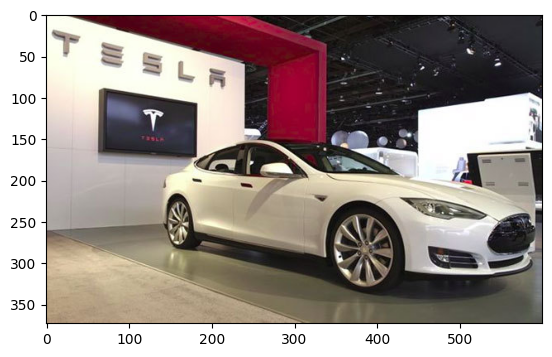

Predicted Class: Tesla
Prediction Score:  0.94162303
Expected Class: Tesla


In [ ]:
img_name = "./cars_test/00005.jpg"     # Expected output: Tesla

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"Tesla")

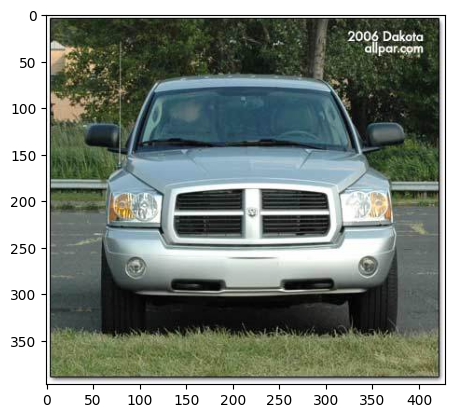

Prediction
    Image name:         ./cars_test/00029.jpg
    Predicted class:      Dodge
    Predicted score:      0.9944713115692139

Predicted Class: Dodge
Prediction Score:  0.9944713
Expected Class: Audi


In [ ]:
img_name = "./cars_test/00029.jpg"     # Expected output: Dodge

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"Audi")

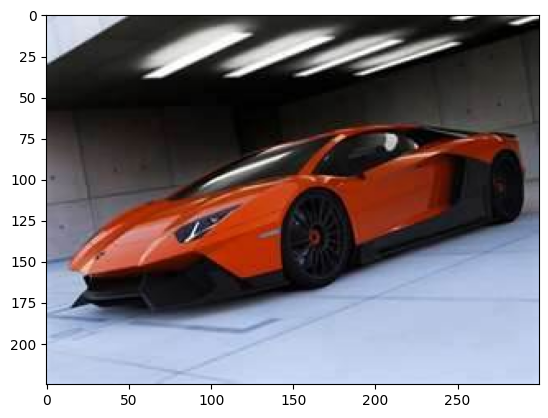

Prediction
    Image name:         ./cars_test/00021.jpg
    Predicted class:      Lamborghini
    Predicted score:      0.7549104690551758

Predicted Class: Lamborghini
Prediction Score:  0.75491047
Expected Class: Lamborghini


In [ ]:
img_name = "./cars_test/00021.jpg"   # Expected output: Lamborghini

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"Lamborghini")

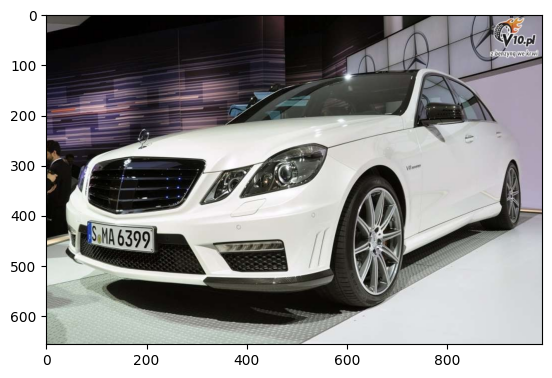

Prediction
    Image name:         ./cars_test/00031.jpg
    Predicted class:      Mercedes-Benz
    Predicted score:      0.8408471941947937

Predicted Class: Mercedes-Benz
Prediction Score:  0.8408472
Expected Class: Mercedes-Benz


In [ ]:
img_name = "./cars_test/00031.jpg"   # Expected output: Mercedes-Benz

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"Mercedes-Benz")

###Step 7 Complete
###Make Classifier Complete

<a id='11'></a>
# Model Classifier
In the same way as the Make Classifier, we will now create our Model Classifier to be able to segregate cars and provide information on their model. It will have its own Train, View Results and Test Results steps.

### Train Dataset

In [ ]:
# Load experiment
gtf = prototype(verbose=1);
gtf.Prototype("Model_classifier", "inception-v3-pytorch")


gtf.Dataset_Params(dataset_path="./cars_train",
                   path_to_csv="vehicles_model.csv",
                   split=0.8,
                   input_size=299,
                   batch_size=64,
                   shuffle_data=True,
                   num_processors=3)

# Transform
gtf.apply_random_horizontal_flip(train=True, val=True)
gtf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True)

# Set Dataset
gtf.Dataset();

Pytorch Version: 1.6.0+cu101

Experiment Details
    Project: Model_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Model_classifier/inception-v3-pytorch/

Dataset Details
    Train path:     data/cars_train
    Val path:       None
    CSV train path: vehicles_model.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:  299
    Batch Size:  64
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.8
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      174



In [ ]:
# Set Training parameters
gtf.Training_Params(num_epochs=10, display_progress=True, display_progress_realtime=True,
                    save_intermediate_models=True, save_training_logs=True)

# Using RMSprop optimizer
gtf.optimizer_sgd(0.06)

# Fixed learning rate
gtf.lr_fixed()

Training params
    Num Epochs: 10

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_

Optimizer
    Name:          sgd
    Learning rate: 0.06
    Params:        {'lr': 0.06, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   fixed
    Params: {}



In [ ]:
gtf.loss_softmax_crossentropy()

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [ ]:
# Set model parameters
gtf.Model_Params(model_name="inception_v3", freeze_base_network=True, use_gpu=True, use_pretrained=True);
# Load model
gtf.Model()
gtf.Freeze_Layers(num=100)

Model Params
    Model name:           inception_v3
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 2

Model params post freezing
    Num trainable layers: 95



In [ ]:
#Start Training
gtf.Train();

Resume training

In [ ]:
gtf = prototype(verbose=1);
gtf.Prototype("Model_classifier", "inception-v3-pytorch", resume_train=True)

Pytorch Version: 1.6.0+cu101

Model Details
    Loading model - workspace/Model_classifier/inception-v3-pytorch/output/models/resume_state
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 95

Experiment Details
    Project: Model_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Model_classifier/inception-v3-pytorch/



In [ ]:
gtf.update_num_epochs(20)   # Increase number of epochs for longer training
gtf.Reload()                # Reload model after updating the parameter

Update: Num Epochs - 20

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      174

Model Details
    Loading model - workspace/Model_classifier/inception-v3-pytorch/output/models/resume_state
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 95



In [ ]:
gtf.Train()

### View and Test Results

In [ ]:
gtf.Summary()



Experiment Summary

System
    Project Name:    Model_classifier
    Project Dir:     workspace/Model_classifier/
    Experiment Name: inception-v3-pytorch
    Experiment Dir:  workspace/Model_classifier/inception-v3-pytorch/
    Library:         Pytorch
    Origin:          ['New', 'New']

Dataset
    Status:       True
    Dataset Type: csv_train
    Train path:   data/cars_train
    Val path:     None
    Test path:    False
    CSV Train:    vehicles_model.csv
    CSV Val:      None
    CSV Test:     False

Dataset Parameters:
    Input Size:   299
    Batch Size:   64
    Shuffle:      True
    Processors:   3
    Num Classes:  174

Dataset Transforms:
    Train transforms: [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Val transforms:   [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Test transforms:  [{'Normalize': {'mean': [0.485, 

In [ ]:
# Load for validation
gtf = prototype(verbose=0);
gtf.Prototype("Model_classifier", "inception-v3-pytorch", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="./cars_test",
                   path_to_csv = "vehicles_model_test.csv")
gtf.Dataset();

# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/S14A2023/Image_classifier/workspace/Model_classifier/inception-v3-pytorch//experiment_state.json'

In [ ]:
print("Test accuracy: ",accuracy)
# print("\nClass based accuracies: ")     # Commented due to large number of classes
# for model in class_based_accuracy:
#   print(model,": ",class_based_accuracy[model]['accuracy(%)'],"%")

Test accuracy:  83.99452804377565


Now we will run the trained model on some sample images to test it.

In [ ]:
# Load model for some sample outputs
gtf = prototype(verbose=0);
gtf.Prototype("Model_classifier", "inception-v3-pytorch", eval_infer=True);

In [ ]:
import matplotlib.pyplot as plt     # To display the images
import matplotlib.image as mpimg
import numpy as np

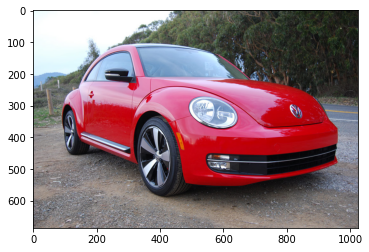

Predicted Class: Beetle
Prediction Score:  0.9993317
Expected Class: Beetle


In [ ]:
img_name = "./cars_test/00089.jpg"     # Expected output: Beetle

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"Beetle")

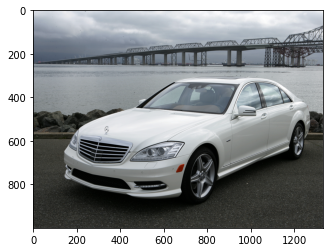

Predicted Class: S-Class
Prediction Score:  0.99433315
Expected Class: S-Class


In [ ]:
img_name = "./cars_test/00025.jpg"     # Expected output: S-Class

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"S-Class")

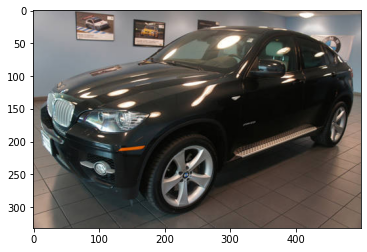

Predicted Class: X6
Prediction Score:  0.88237995
Expected Class: X6


In [ ]:
img_name = "./cars_test/00035.jpg"   # Expected output: X6

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"X6")

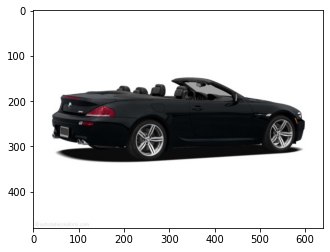

Predicted Class: M6
Prediction Score:  0.99515754
Expected Class: M6


In [ ]:
img_name = "./cars_test/00060.jpg"   # Expected output: M6

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"M6")

###Model Classifier Complete

#Year Classifier
In the same way as the Make and Model Classifier, we will now create our Year Classifier to be able to segregate cars and provide information on their year. It will have its own Train, View Results and Test Results steps.

### Training the Dataset

In [ ]:
# Load experiment
gtf = prototype(verbose=1);
gtf.Prototype("Year_classifier", "inception-v3-pytorch")


gtf.Dataset_Params(dataset_path="cars_train",
                   path_to_csv="vehicles_year.csv",
                   split=0.8, input_size=299,
                   batch_size=128,
                   shuffle_data=True,
                   num_processors=3)

# Transform
gtf.apply_random_horizontal_flip(train=True, val=True)
gtf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True)

# Set Dataset
gtf.Dataset();

Pytorch Version: 1.6.0+cu101

Experiment Details
    Project: Year_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Year_classifier/inception-v3-pytorch/

Dataset Details
    Train path:     data/cars_train
    Val path:       None
    CSV train path: vehicles_year.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:  299
    Batch Size:  128
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.8
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      16



In [ ]:
# Set model parameters
gtf.Model_Params(model_name="inception_v3", freeze_base_network=True, use_gpu=True, use_pretrained=True)

# Load model
gtf.Model()

gtf.Freeze_Layers(num=100)

Model Params
    Model name:           inception_v3
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 2

Model params post freezing
    Num trainable layers: 95



In [ ]:
# Set Training parameters
gtf.Training_Params(num_epochs=5, display_progress=True, display_progress_realtime=True,
                    save_intermediate_models=True, save_training_logs=True)

# Using RMSprop optimizer
gtf.optimizer_sgd(0.06)

# Fixed learning rate
gtf.lr_fixed()

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_

Optimizer
    Name:          sgd
    Learning rate: 0.06
    Params:        {'lr': 0.06, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   fixed
    Params: {}



In [ ]:
gtf.loss_softmax_crossentropy()

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [ ]:
#Start Training
gtf.Train();

Resume training

In [ ]:
gtf = prototype(verbose=1);
gtf.Prototype("Year_classifier", "inception-v3-pytorch", resume_train=True)

Pytorch Version: 1.6.0+cu101

Model Details
    Loading model - workspace/Year_classifier/inception-v3-pytorch/output/models/resume_state
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 95

Experiment Details
    Project: Year_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Year_classifier/inception-v3-pytorch/



In [ ]:
gtf.update_num_epochs(20)   # Increase number of epochs for longer training
gtf.Reload()                # Reload model after updating the parameter

Update: Num Epochs - 20

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      16

Model Details
    Loading model - workspace/Year_classifier/inception-v3-pytorch/output/models/resume_state
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 95



In [ ]:
gtf.Train()

### Testing and Viewing Results

In [ ]:
gtf.Summary()



Experiment Summary

System
    Project Name:    Year_classifier
    Project Dir:     workspace/Year_classifier/
    Experiment Name: inception-v3-pytorch
    Experiment Dir:  workspace/Year_classifier/inception-v3-pytorch/
    Library:         Pytorch
    Origin:          ['New', 'New']

Dataset
    Status:       True
    Dataset Type: csv_train
    Train path:   data/cars_train
    Val path:     None
    Test path:    False
    CSV Train:    vehicles_year.csv
    CSV Val:      None
    CSV Test:     False

Dataset Parameters:
    Input Size:   299
    Batch Size:   128
    Shuffle:      True
    Processors:   3
    Num Classes:  16

Dataset Transforms:
    Train transforms: [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Val transforms:   [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Test transforms:  [{'Normalize': {'mean': [0.485, 0.45

In [ ]:
# Load for validation

gtf = prototype(verbose=0)
gtf.Prototype("Year_classifier", "inception-v3-pytorch", eval_infer=True)


# Set dataset
gtf.Dataset_Params(dataset_path="cars_test",
                   path_to_csv = "vehicles_year_test.csv")
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

In [ ]:
print("Test accuracy: ",accuracy)
print("\nClass based accuracies: ")
for model in class_based_accuracy:
  print(model,": ",class_based_accuracy[model]['accuracy(%)'],"%")

Test accuracy:  83.18617087426937

Class based accuracies: 
1991 :  82.6086956521739 %
1993 :  88.32116788321169 %
1994 :  92.80000000000001 %
1997 :  76.74418604651163 %
1998 :  69.56521739130434 %
1999 :  75.0 %
2000 :  79.54545454545455 %
2001 :  73.86363636363636 %
2002 :  75.55555555555556 %
2006 :  42.22222222222222 %
2007 :  70.70610687022901 %
2008 :  62.056737588652474 %
2009 :  67.4812030075188 %
2010 :  52.33415233415234 %
2011 :  52.103559870550164 %
2012 :  94.27850231384097 %


###Run the trained model on some sample images
We will now use sample images to test the trained model.

In [ ]:
# Load model for some sample outputs
gtf = prototype(verbose=0);
gtf.Prototype("Year_classifier", "inception-v3-pytorch", eval_infer=True);

In [ ]:
import matplotlib.pyplot as plt     # To display the images
import matplotlib.image as mpimg

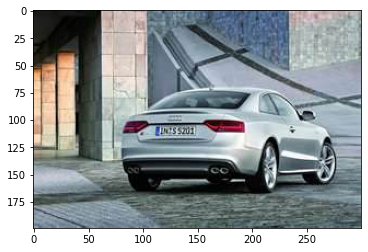

Predicted Class: 2012
Prediction Score:  0.9993736
Expected Class: 2012


In [ ]:
img_name = "./cars_test/00019.jpg"     # Expected output: 2012

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"2012")

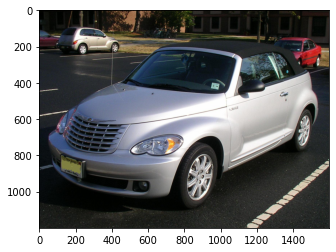

Predicted Class: 2008
Prediction Score:  0.96509093
Expected Class: 2008


In [ ]:
img_name = "./cars_test/00023.jpg"     # Expected output: 2008

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"2008")

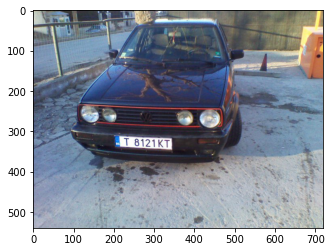

Predicted Class: 1991
Prediction Score:  0.9977338
Expected Class: 1991


In [ ]:
img_name = "./cars_test/00026.jpg"   # Expected output: 1991

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"1991")

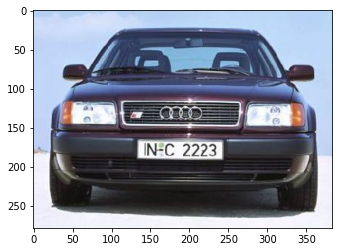

Predicted Class: 1994
Prediction Score:  0.79095423
Expected Class: 1994


In [ ]:
img_name = "./cars_test/00070.jpg"   # Expected output: 1994

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print("Predicted Class: "+predictions['predicted_class'].replace('_',''))
print("Prediction Score: ",predictions['score'])
print("Expected Class: "+"1994")

###Year Classifier Complete


All the Classifiers complete and will be deployed on the Flask API next.